<a href="https://colab.research.google.com/github/pireshenrique/Porfolio-Ciencia-de-dados/blob/main/Previs%C3%A3o_de_casa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/housing_price_dataset.csv')

Analise dos dados e limpeza dos dados

In [ ]:
dataset.shape

(50000, 6)

In [ ]:
dataset.tail()


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957
49999,1572,5,3,Rural,2011,221618.583218


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [ ]:
dataset = dataset.drop_duplicates()
dataset.shape

(50000, 6)

In [ ]:
Count = dataset['Neighborhood'].value_counts()
dataset['Neighborhood'].nunique()
Count

Suburb    16721
Rural     16676
Urban     16603
Name: Neighborhood, dtype: int64

In [ ]:
dataset.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [ ]:
linhas_negativas = dataset[dataset['Price'] < 0]
linhas_negativas.shape

(22, 6)

In [ ]:
df_clean1 = dataset[dataset['Price'] >= 0]

In [ ]:
df_clean1.shape

(49978, 6)

In [ ]:
df_clean1.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [ ]:
df_clean1.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,49978.000000,49978.000000,49978.000000,49978.000000,49978.000000
mean,2006.752551,3.498659,1.995458,1985.404338,224931.667960
std,575.350298,1.116325,0.815859,20.718407,75995.682992
min,1000.000000,2.000000,1.000000,1950.000000,154.779120
25%,1514.000000,3.000000,1.000000,1967.000000,170007.487130
50%,2008.000000,3.000000,2.000000,1985.000000,225100.123857
75%,2506.000000,4.000000,3.000000,2003.000000,279395.826288
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


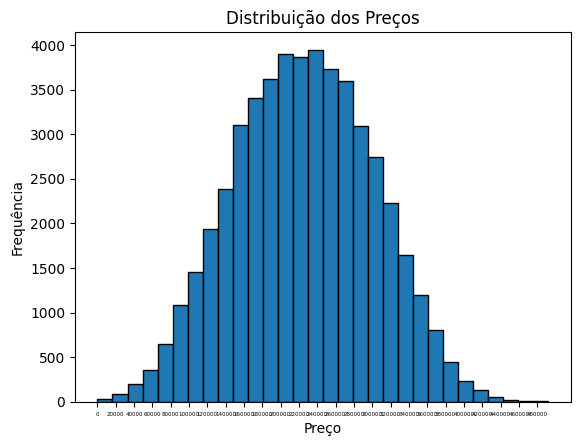

In [ ]:
import matplotlib.pyplot as plt

# Histograma dos preços
plt.hist(df_clean1['Price'], bins=30, edgecolor='black')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.title('Distribuição dos Preços')
plt.xticks(range(0, int(max(df_clean1['Price']))+1, 20000), fontsize=4)
plt.show()


In [ ]:
precos_baixos = df_clean1[df_clean1['Price'] < 20000]
precos_baixos.shape

(54, 6)

In [ ]:
df_clean2 = df_clean1[df_clean1['Price'] >= 20000]

In [ ]:
df_clean2.shape

(49924, 6)

In [ ]:
df_clean2.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,49924.000000,49924.000000,49924.000000,49924.000000,49924.000000
mean,2007.665191,3.499219,1.995693,1985.401290,225161.110528
std,574.968048,1.116270,0.815884,20.720584,75715.497632
min,1000.000000,2.000000,1.000000,1950.000000,20075.486094
25%,1515.000000,3.000000,1.000000,1967.000000,170153.321382
50%,2009.000000,3.000000,2.000000,1985.000000,225167.634031
75%,2506.000000,4.000000,3.000000,2003.000000,279492.707839
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


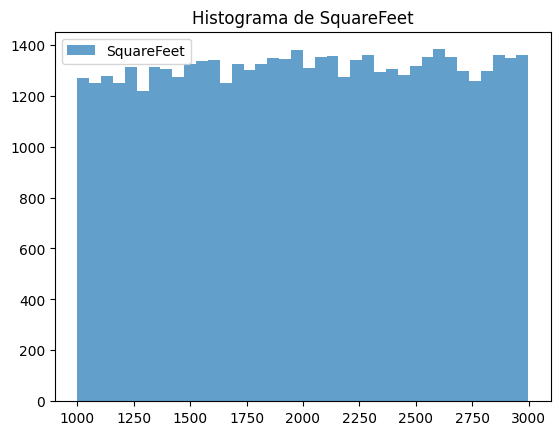

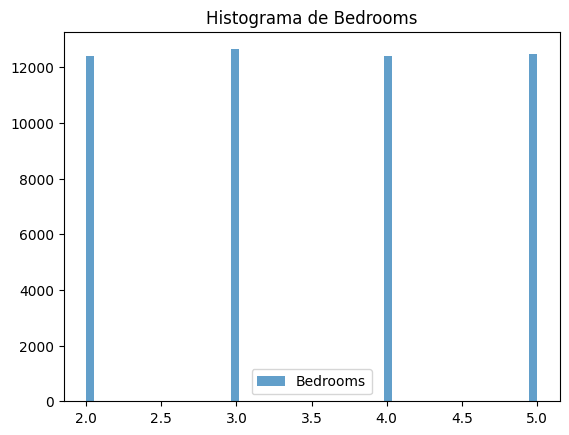

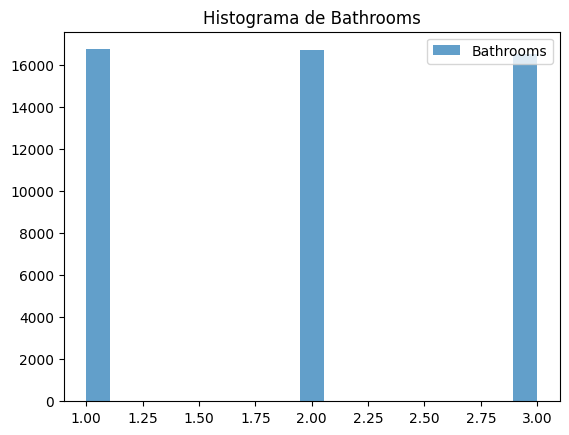

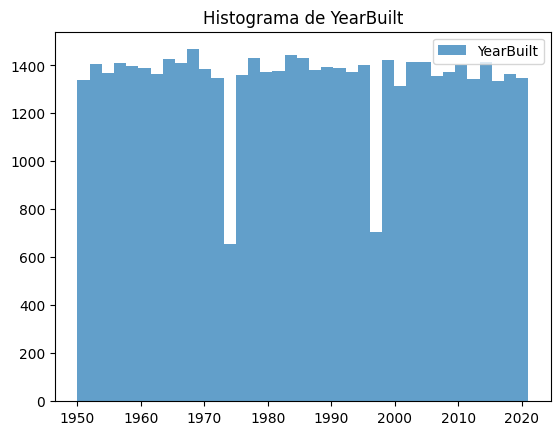

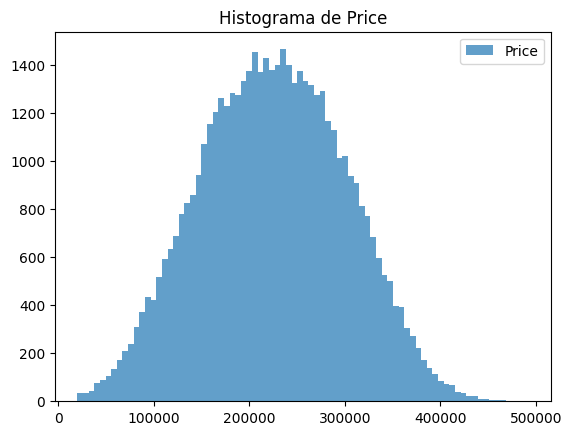

In [ ]:
for column in ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']:
    plt.hist(df_clean2[column], bins='auto', alpha=0.7, label=column)
    plt.title(f'Histograma de {column}')
    plt.legend()
    plt.show()

In [ ]:
from scipy.stats import shapiro

# Exemplo usando o teste de Shapiro-Wilk
for column in ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']:
    stat, p_value = shapiro(df_clean2[column])
    print(f'Teste de Shapiro-Wilk para {column}: Estatística de teste = {stat}, Valor p = {p_value}')

Teste de Shapiro-Wilk para SquareFeet: Estatística de teste = 0.9560195803642273, Valor p = 0.0
Teste de Shapiro-Wilk para Bedrooms: Estatística de teste = 0.8565401434898376, Valor p = 0.0
Teste de Shapiro-Wilk para Bathrooms: Estatística de teste = 0.7938578128814697, Valor p = 0.0
Teste de Shapiro-Wilk para YearBuilt: Estatística de teste = 0.9548231363296509, Valor p = 0.0
Teste de Shapiro-Wilk para Price: Estatística de teste = 0.9967707395553589, Valor p = 4.2952604956447534e-30


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Processamento dos dados

In [ ]:
colunas_numericas = df_clean2[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt','Price']]
colunas_categoricas = df_clean2[['Neighborhood']]

In [ ]:
colunas_numericas

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
0,2126,4,1,1969,215355.283618
1,2459,3,2,1980,195014.221626
2,1860,2,1,1970,306891.012076
3,2294,2,1,1996,206786.787153
4,2130,5,2,2001,272436.239065
...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895
49996,2854,2,2,1988,374507.656727
49997,2979,5,3,1962,384110.555590
49998,2596,5,2,1984,380512.685957


In [ ]:
y_one_hot_encoded = pd.get_dummies(colunas_categoricas)
y_one_hot_encoded.shape

(49924, 3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = MinMaxScaler()
colunas_normalizadas = scaler.fit_transform(colunas_numericas)
colunas_normalizadas

array([[0.56328164, 0.66666667, 0.        , 0.26760563, 0.41362342],
       [0.72986493, 0.33333333, 0.5       , 0.42253521, 0.37053889],
       [0.43021511, 0.        , 0.        , 0.28169014, 0.60750585],
       ...,
       [0.989995  , 1.        , 1.        , 0.16901408, 0.77106508],
       [0.7983992 , 1.        , 0.5       , 0.47887324, 0.76344441],
       [0.28614307, 1.        , 1.        , 0.85915493, 0.42688976]])

In [ ]:
nomes_colunas = colunas_numericas.columns

In [ ]:
df_normalizado = pd.DataFrame(data=colunas_normalizadas,columns=nomes_colunas)

In [ ]:
df_normalizado.reset_index(drop=True, inplace=True)
y_one_hot_encoded.reset_index(drop=True, inplace=True)
df_clean2.reset_index(drop=True, inplace=True)

In [ ]:
df_clean3_normalizado = pd.concat([df_normalizado, y_one_hot_encoded], axis=1)
df_clean3_normalizado

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,0.563282,0.666667,0.0,0.267606,0.413623,1,0,0
1,0.729865,0.333333,0.5,0.422535,0.370539,1,0,0
2,0.430215,0.000000,0.0,0.281690,0.607506,0,1,0
3,0.647324,0.000000,0.0,0.647887,0.395474,0,0,1
4,0.565283,1.000000,0.5,0.718310,0.534527,0,1,0
...,...,...,...,...,...,...,...,...
49919,0.141071,1.000000,1.0,0.352113,0.169460,1,0,0
49920,0.927464,0.000000,0.5,0.535211,0.750725,0,1,0
49921,0.989995,1.000000,1.0,0.169014,0.771065,0,1,0
49922,0.798399,1.000000,0.5,0.478873,0.763444,1,0,0


Definindo o modelo

In [ ]:
X_normalizado = df_clean3_normalizado.drop(['Price'], axis = 1).values
y_normalizado = df_clean3_normalizado.iloc[:,4].values
y_normalizado

array([0.41362342, 0.37053889, 0.60750585, ..., 0.77106508, 0.76344441,
       0.42688976])

In [ ]:
X_normalizado

array([[0.56328164, 0.66666667, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.72986493, 0.33333333, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.43021511, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.989995  , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7983992 , 1.        , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.28614307, 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y_normalizado, test_size=0.2, random_state=26)

In [ ]:
from sklearn.linear_model import LinearRegression
Regressao = LinearRegression()
Regressao.fit(X_treino,y_treino)
intercept = Regressao.intercept_
coef =Regressao.coef_
previsãolinear =Regressao.predict(X_teste)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mseLinear = mean_squared_error(y_teste, previsãolinear)
r2Linear = r2_score(y_teste, previsãolinear)

In [ ]:
print(mseLinear)
print(r2Linear)

0.010937889750718289
0.5720131718419614


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
modelo_arvore_decisao = DecisionTreeRegressor(random_state=26)
modelo_arvore_decisao.fit(X_treino,y_treino)
precisaoArvore = modelo_arvore_decisao.predict(X_teste)

In [ ]:
mseArvore = mean_squared_error(y_teste, precisaoArvore)
r2Arvore = r2_score(y_teste, precisaoArvore)

In [ ]:
print(mseArvore)
print(r2Arvore)

0.022983822557384702
0.10066991536129921


In [ ]:
# Desvio padrão da variável de resposta (Price)
std_price = df_clean3_normalizado['Price'].std()

# Compare o MSE com o desvio padrão
if mseArvore < std_price:
    print("O MSE é significativamente menor que o desvio padrão da variável de resposta.")


O MSE é significativamente menor que o desvio padrão da variável de resposta.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor()
RandomForest.fit(X_treino,y_treino)
previsaoRandom =RandomForest.predict(X_teste)

In [ ]:
mseRandom = mean_squared_error(y_teste, previsaoRandom)
r2Random = r2_score(y_teste, previsaoRandom)

In [ ]:
print(mseRandom)
print(r2Random)

0.012475958131745159
0.5118303556965864


In [ ]:
print('MSE com regressão Linear:',mseLinear)
print('MSE com Arvore de Decisão:',mseArvore)
print('MSE com Random Florest:',mseRandom)

MSE com regressão Linear: 0.010937889750718289
MSE com Arvore de Decisão: 0.022983822557384702
MSE com Random Florest: 0.012475958131745159


In [ ]:
print('R2 com regressão Linear:',r2Linear)
print('R2 com Arvore de Decisão:',r2Arvore)
print('R2 com Random Florest:',r2Random)

R2 com regressão Linear 0.5720131718419614
R2 com Arvore de Decisão 0.10066991536129921
R2 com Random Florest 0.5118303556965864
